# Three observations or inferences

1. There were 249 mice in the study at timepoint 0, 49.8% female and 50.2% male. There were only 130 mice toward the end of the study at timepoint 45. At timepoint 45, Capomulin had 21 mice and Ramicane have 20 mice. Propriva only have 7 mice left toward the end of the study and Infubinol only have 9 left.

2. Analysing four of the treatment regimens - Capomulin, Ramicane, Infubinol and Ceftamin. We can see that Infubinol and Ramicane data set both are normally distributed whereas Capomulin and Cerftamin data set are both negative skew (the mean is less than the median). There are no outlier for treatment Capomulin, Ramicane and Ceftamin expect Infusion. The tumor volume for Mouse ID c326 was only 36.321346mm3 which is lower than the lower bond 36.8329.  Mouse ID x401 treated with Capomulin was randomly selected in the study and we can see that the tumor volume decrease as the timepoint increases.

3. Analysing the weights and the average tumor volume, we can see that there is a positive relationship between these two factors. As the weight increases and the average tumor volume increases. The correlation between both factors is 0.84 which can be considered strong as the r value is above 0.7.

# Observations and Insights

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
# Checking the number of mice.
number_of_mice = combined_mouse_data["Mouse ID"].count()
number_of_mice

1893

In [3]:
# Checking the number of mice.
number_of_unique_mice = len(combined_mouse_data["Mouse ID"].value_counts())
number_of_unique_mice

249

In [4]:
# based on out[2] and out[3], we can see that there are duplicate mouse ID.

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_data.loc[combined_mouse_data.duplicated(["Mouse ID"], keep=False)]
duplicate_mice_df = duplicate_mice[["Mouse ID", "Timepoint"]]
duplicate_mice_df

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#checking the table of duplicate_mice only show duplicate by ID number
duplicate_mice_check = duplicate_mice["Mouse ID"].value_counts()
duplicate_mice_check 
# we can see that the min number in below table is 2. There will be one if the list also show not duplicate mouse ID

g989    13
z578    10
g288    10
m550    10
d251    10
        ..
c326     2
m756     2
y601     2
w140     2
w678     2
Name: Mouse ID, Length: 237, dtype: int64

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicate_mice = combined_mouse_data.drop_duplicates(subset=["Mouse ID"])
remove_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_in_clean_dataframe = remove_duplicate_mice["Mouse ID"].count()
number_of_mice_in_clean_dataframe

249

# Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#create series
mean_tumor = combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor = combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation_tumor = combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#create a data frame
summary_statistics = pd.DataFrame({"Mean":mean_tumor,
                                   "Median":median_tumor,
                                   "Variance":variance_tumor,
                                   "Standard Deviation":standard_deviation_tumor,
                                   "SEM":SEM})

#display result
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_mice_df=combined_mouse_data.groupby("Drug Regimen")
mean_tumor = grouped_mice_df["Tumor Volume (mm3)"].mean()
median_tumor = grouped_mice_df["Tumor Volume (mm3)"].median()
variance_tumor = grouped_mice_df["Tumor Volume (mm3)"].var()
standard_deviation_tumor = grouped_mice_df["Tumor Volume (mm3)"].std()
SEM = grouped_mice_df["Tumor Volume (mm3)"].sem()

#create a dataframe
groupby_summary_statistics = pd.DataFrame({"Mean":mean_tumor,
                                           "Median":median_tumor,
                                           "Variance":variance_tumor,
                                           "Standard Deviation":standard_deviation_tumor,
                                           "SEM":SEM})

#display result
groupby_summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


#  Bar and Pie Charts

In [12]:
#number of unique timepoint
combined_mouse_data["Timepoint"].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

Text(0.5, 1.0, 'Number of Mice for Each Treatment Throughout The Course of The Study')

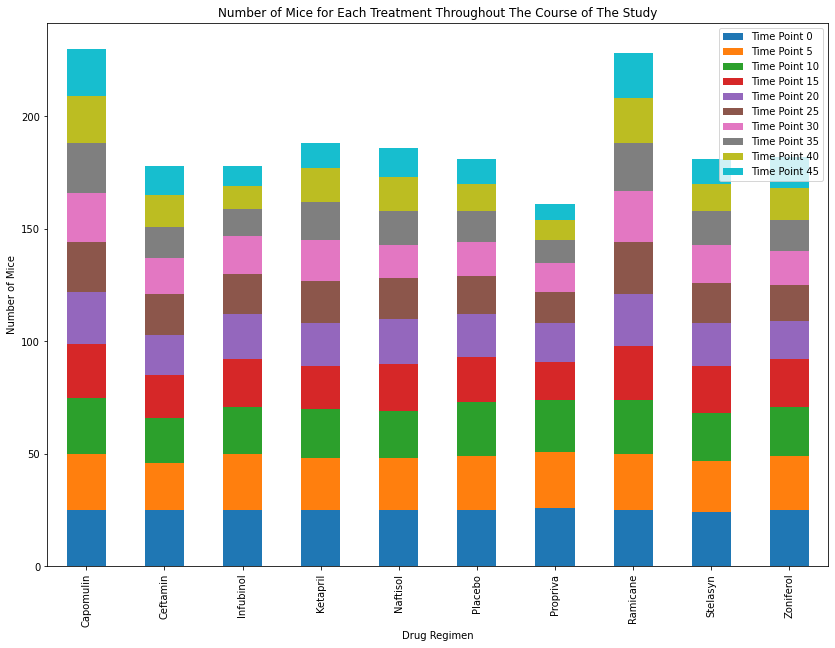

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

#total number of mice for each treatment
#total number of mice for timepoint 0
TimePoint0_df = combined_mouse_data[combined_mouse_data["Timepoint"] == 0]
Mouse_0 = TimePoint0_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#total number of mice for timepoint 5
TimePoint5_df = combined_mouse_data[combined_mouse_data["Timepoint"] == 5]
Mouse_5 = TimePoint5_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#total number of mice for timepoint 10
TimePoint10_df = combined_mouse_data[combined_mouse_data["Timepoint"] == 10]
Mouse_10 = TimePoint10_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#total number of mice for timepoint 15
TimePoint15_df = combined_mouse_data[combined_mouse_data["Timepoint"] == 15]
Mouse_15 = TimePoint15_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#total number of mice for timepoint 20
TimePoint20_df = combined_mouse_data[combined_mouse_data["Timepoint"] == 20]
Mouse_20 = TimePoint20_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#total number of mice for timepoint 25
TimePoint25_df = combined_mouse_data[combined_mouse_data["Timepoint"] == 25]
Mouse_25 = TimePoint25_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#total number of mice for timepoint 30
TimePoint30_df = combined_mouse_data[combined_mouse_data["Timepoint"] == 30]
Mouse_30 = TimePoint30_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#total number of mice for timepoint 35
TimePoint35_df = combined_mouse_data[combined_mouse_data["Timepoint"] == 35]
Mouse_35 = TimePoint35_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#total number of mice for timepoint 40
TimePoint40_df = combined_mouse_data[combined_mouse_data["Timepoint"] == 40]
Mouse_40 = TimePoint40_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#total number of mice for timepoint 45
TimePoint45_df = combined_mouse_data[combined_mouse_data["Timepoint"] == 45]
Mouse_45 = TimePoint45_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#create a dataframe for total number of mice for each treatment throughout the course of the study
number_of_mouse = pd.DataFrame({"Time Point 0":Mouse_0,
                                "Time Point 5":Mouse_5,
                                "Time Point 10":Mouse_10,
                                "Time Point 15":Mouse_15,
                                "Time Point 20":Mouse_20,
                                "Time Point 25":Mouse_25,
                                "Time Point 30":Mouse_30,
                                "Time Point 35":Mouse_35,
                                "Time Point 40":Mouse_40,
                                "Time Point 45":Mouse_45})

number_of_mouse 

axes = number_of_mouse.plot.bar(stacked=True,align='center',figsize=(14,10))
plt.legend(loc="best")
plt.ylabel("Number of Mice")
plt.title("Number of Mice for Each Treatment Throughout The Course of The Study")

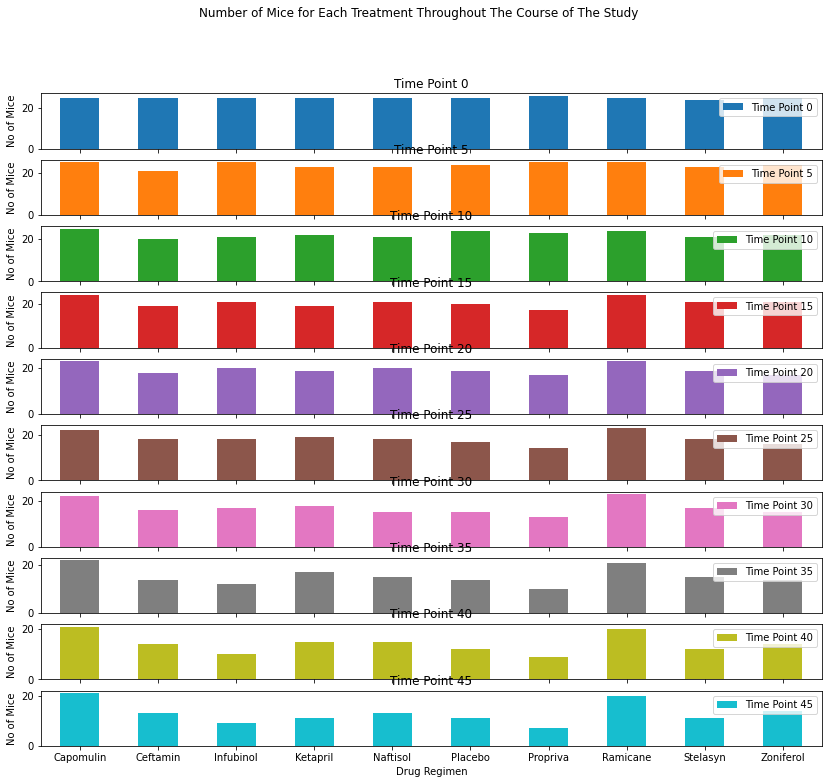

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
#using subplot to clearly see the number of mice throughout the period
axes = number_of_mouse.plot.bar(rot=0, subplots=True, align='center',figsize=(14,12),title="Number of Mice for Each Treatment Throughout The Course of The Study",ylabel ="No of Mice")
plt.legend(loc="best")

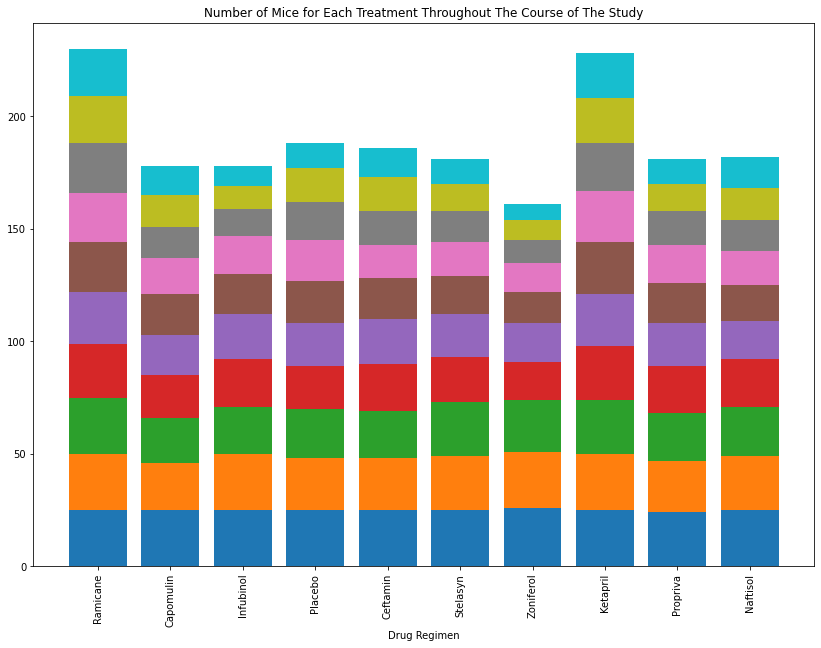

<Figure size 1008x720 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#data for bar graph
treatment = combined_mouse_data["Drug Regimen"].unique().tolist()
Mouse_0 = TimePoint0_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
Mouse_5 = TimePoint5_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
Mouse_10 = TimePoint10_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
Mouse_15 = TimePoint15_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
Mouse_20 = TimePoint20_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
Mouse_25 = TimePoint25_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
Mouse_30 = TimePoint30_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
Mouse_35 = TimePoint35_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
Mouse_40 = TimePoint40_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
Mouse_45 = TimePoint45_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()

# for stack graph
dataset1 = np.array(Mouse_0)
dataset2 = np.array(Mouse_5) + dataset1
dataset3 = np.array(Mouse_10) + dataset2
dataset4 = np.array(Mouse_15) + dataset3
dataset5 = np.array(Mouse_20) + dataset4 
dataset6 = np.array(Mouse_25) + dataset5 
dataset7 = np.array(Mouse_30) + dataset6 
dataset8 = np.array(Mouse_35) + dataset7 
dataset9 = np.array(Mouse_40) + dataset8 
dataset10 = np.array(Mouse_45) + dataset9 

x_axis = treatment
fig = plt.figure(figsize=(14,10))

# Create a bar chart based upon the above data
T0 = plt.bar(x_axis, Mouse_0, align="center")
T5 = plt.bar(x_axis, Mouse_5, bottom=dataset1 , align="center")
T10 = plt.bar(x_axis, Mouse_10, bottom=dataset2, align="center")
T15 = plt.bar(x_axis, Mouse_15, bottom=dataset3, align="center")
T20 = plt.bar(x_axis, Mouse_20, bottom=dataset4, align="center")
T25 = plt.bar(x_axis, Mouse_25, bottom=dataset5, align="center")
T30 = plt.bar(x_axis, Mouse_30, bottom=dataset6, align="center")
T35 = plt.bar(x_axis, Mouse_35, bottom=dataset7, align="center")
T40 = plt.bar(x_axis, Mouse_40, bottom=dataset8, align="center")
T45 = plt.bar(x_axis, Mouse_45, bottom=dataset9, align="center")


plt.title("Number of Mice for Each Treatment Throughout The Course of The Study")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
fig = plt.figure(figsize=(14,10))

plt.show()

Text(0.5, 1.0, 'Distribution of Female Versus Male')

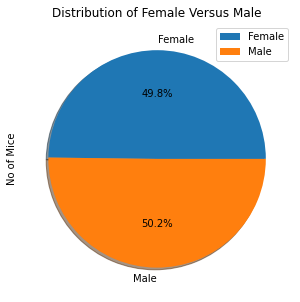

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df=mouse_metadata.groupby("Sex")
number_mice_gender = mice_gender_df["Mouse ID"].count()

#create a dataframe
distribution_summary = pd.DataFrame({"No of Mice":number_mice_gender})

#plotting
plot = distribution_summary.plot.pie(y="No of Mice", autopct='%1.1f%%', shadow=True,figsize=(5, 5))
plt.title("Distribution of Female Versus Male")

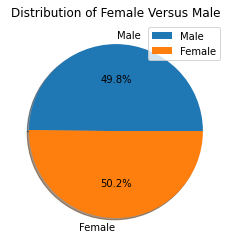

<Figure size 720x720 with 0 Axes>

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#data for pie chart
mice_gender = mouse_metadata["Sex"].unique().tolist()
number_mice_gender = mice_gender_df["Mouse ID"].count().tolist()

#plotting
plt.title("Distribution of Female Versus Male")
plt.pie(number_mice_gender, labels=mice_gender, autopct="%1.1f%%", shadow=True)
plt.legend(mice_gender,loc="best")
fig = plt.figure(figsize=(10,10))

# Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_volume = combined_mouse_data.set_index("Drug Regimen", append=False)
tumor_volume = tumor_volume.sort_values("Timepoint",ascending=False)
tumor_volume = tumor_volume.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]

#grouped by Mouse ID
grouped_tumor_volume = tumor_volume.groupby("Mouse ID").max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_last_point = pd.DataFrame(grouped_tumor_volume)
tumor_volume_last_point = pd.merge(tumor_volume_last_point, combined_mouse_data, on=("Mouse ID","Timepoint"),how="left")
tumor_volume_last_point_by_mouseid_timepoint = tumor_volume_last_point[["Mouse ID", "Timepoint","Tumor Volume (mm3)"]]
tumor_volume_last_point_by_mouseid_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3)
0,a203,45,67.973419
1,a251,45,65.525743
2,a275,45,62.999356
3,a411,45,38.407618
4,a444,45,43.047543


In [19]:
grouped_tumor_volume

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds


# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
    
for treatment in treatments:
    
    tumor_volume.append(tumor_volume_last_point.loc[tumor_volume_last_point["Drug Regimen"] == treatment]["Tumor Volume (mm3)"])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumor_volume_last_point.loc[tumor_volume_last_point["Drug Regimen"] == treatment]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatment}'s tumor volume is: {lowerq}")
    print(f"The upper quartile of {treatment}'s tumor volume is: {upperq}")
    print(f"The interquartile range of {treatment}'s tumor volume is: {iqr}")
    print(f"The the median of {treatment}'s tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print('-'*20)
    print(f"{treatment}'s Potential Outliers")
    outlier = tumor_volume_last_point.loc[tumor_volume_last_point["Drug Regimen"] == treatment][(tumor_volume_last_point["Tumor Volume (mm3)"] < lower_bound) | (tumor_volume_last_point["Tumor Volume (mm3)"] > upper_bound)]
    print(outlier[["Drug Regimen","Mouse ID", "Timepoint","Tumor Volume (mm3)"]])
    print('-'*20)
    print('-'*20)
    

The lower quartile of Capomulin's tumor volume is: 32.37735684
The upper quartile of Capomulin's tumor volume is: 40.1592203
The interquartile range of Capomulin's tumor volume is: 7.781863460000004
The the median of Capomulin's tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------
Capomulin's Potential Outliers
Empty DataFrame
Columns: [Drug Regimen, Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []
--------------------
--------------------
The lower quartile of Ramicane's tumor volume is: 31.56046955
The upper quartile of Ramicane's tumor volume is: 40.65900627
The interquartile range of Ramicane's tumor volume is: 9.098536719999998
The the median of Ramicane's tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
--------------------
Ramicane's Potential Outliers
Empty DataFrame
Columns: [Drug Regimen, Mouse ID, Tim

C:\Users\TEHS\Anaconda3\envs\homework\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\TEHS\Anaconda3\envs\homework\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\TEHS\Anaconda3\envs\homework\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\TEHS\Anaconda3\envs\homework\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


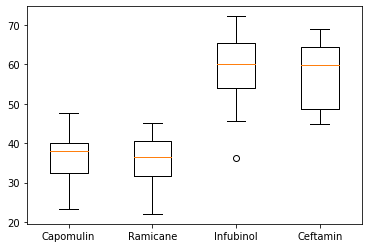

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels = treatments)
plt.show()

# Line and Scatter Plots

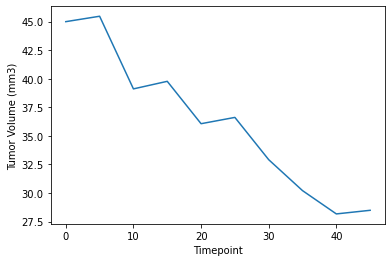

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#create a dataframe
capomulin_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] == "Capomulin",:]
capomulin_line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "x401",["Timepoint", "Tumor Volume (mm3)"]]

#plotting
plt.plot(capomulin_line_df["Timepoint"], capomulin_line_df["Tumor Volume (mm3)"])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

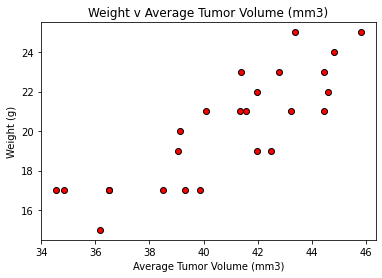

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
    
#create a dataframe
capomulin_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] == "Capomulin",:]
capomulin_scatter_df = capomulin_df.groupby("Mouse ID").mean()

x = capomulin_scatter_df["Tumor Volume (mm3)"]
y = capomulin_scatter_df["Weight (g)"]

plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")
plt.title("Weight v Average Tumor Volume (mm3)")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

#  Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708717


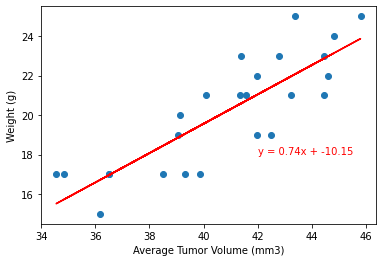

In [25]:
#linear regression model 
x_values = x
y_values = y
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,18),fontsize=10,color="red")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.show()